Student Performance Analysis - This project focuses on analyzing a student academic performance dataset, which includes gender, parental education, weekly study hours, and more.

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("Expanded_data_with_more_features.csv.zip.csv")

In [46]:
df.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05-Oct,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05-Oct,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05-Oct,76,78,75


In [47]:
df.shape

(30641, 15)

In [48]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [49]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [51]:
df.drop("Unnamed: 0", axis=1, inplace=True)

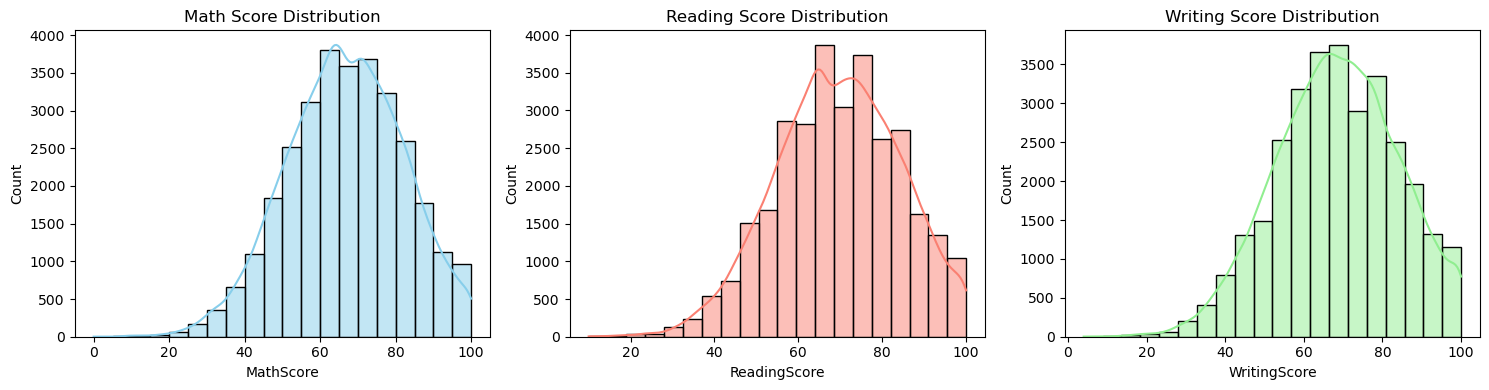

In [52]:
# Histogram for MathScore
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='MathScore', bins=20, kde=True, color='skyblue')
plt.title('Math Score Distribution')

# Histogram for ReadingScore
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='ReadingScore', bins=20, kde=True, color='salmon')
plt.title('Reading Score Distribution')

# Histogram for WritingScore
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='WritingScore', bins=20, kde=True, color='lightgreen')
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()

In [53]:
df[['MathScore', 'ReadingScore', 'WritingScore']].skew()

MathScore      -0.162862
ReadingScore   -0.181288
WritingScore   -0.159830
dtype: float64

All three subjects show scores mostly between 60–80 with slight left skew, indicating consistent mid-to-high performance across subjects.


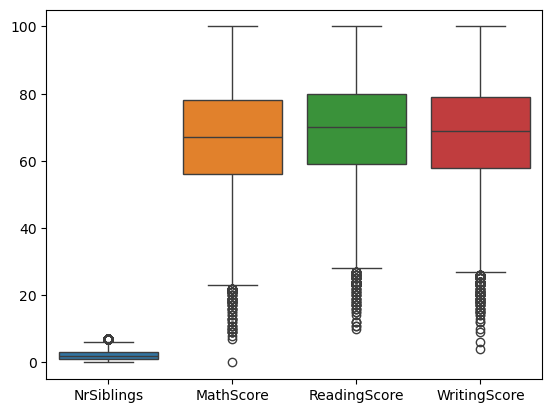

In [54]:
sns.boxplot(data=df.select_dtypes(include='number'))
plt.show()

In [55]:
def get_iqr_bounds(df, multiplier=1.5):
    bounds = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        bounds[col] = (lower, upper)
    return bounds
    
def count_outliers_iqr(df, multiplier=1.5):
    bounds = get_iqr_bounds(df, multiplier)
    outlier_counts = {}
    for col, (low, high) in bounds.items():
        outliers = df[(df[col] < low) | (df[col] > high)]
        outlier_counts[col] = outliers.shape[0]
    return outlier_counts

def replace_outliers_iqr(df, multiplier=1.5):
    bounds = get_iqr_bounds(df, multiplier)
    df = df.copy()
    for col, (low, high) in bounds.items():
        df[col] = np.where(df[col] > high, high,
                           np.where(df[col] < low, low, df[col]))
    return df

print(count_outliers_iqr(df))
df = replace_outliers_iqr(df)
print(count_outliers_iqr(df))  # should be all 0


{'NrSiblings': 291, 'MathScore': 76, 'ReadingScore': 90, 'WritingScore': 109}
{'NrSiblings': 0, 'MathScore': 0, 'ReadingScore': 0, 'WritingScore': 0}


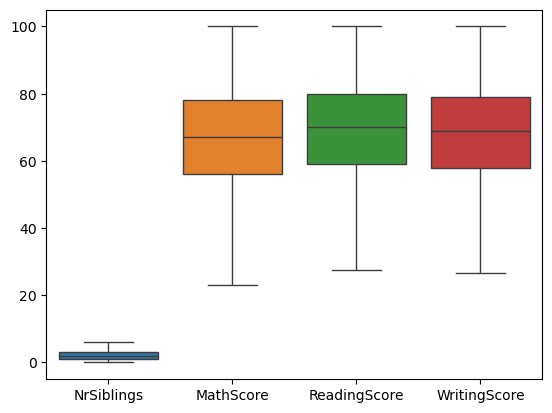

In [56]:
sns.boxplot(data=df.select_dtypes(include='number'))
plt.show()

Outliers were identified and removed using the IQR method, resulting in cleaner distributions for analysis.

In [57]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [58]:
df["EthnicGroup"] = df["EthnicGroup"].fillna(df["EthnicGroup"].mode()[0])
#We only need one most frequent value to fill NaNs. [0] accesses the first element of that Series.

In [59]:
df["ParentEduc"] = df["ParentEduc"].fillna(df["ParentEduc"].mode()[0])

In [60]:
df["TestPrep"] = df["TestPrep"].fillna(df["TestPrep"].mode()[0])

In [61]:
df["ParentMaritalStatus"] = df["ParentMaritalStatus"].fillna(df["ParentMaritalStatus"].mode()[0])

In [62]:
df["PracticeSport"] = df["PracticeSport"].fillna(df["PracticeSport"].mode()[0])

In [63]:
df["IsFirstChild"] = df["IsFirstChild"].fillna(df["IsFirstChild"].mode()[0])

In [64]:
numeric_df = df.select_dtypes(include='number')
correlation_with_nrsiblings = numeric_df.corr()['NrSiblings'].drop('NrSiblings')
print(correlation_with_nrsiblings)

MathScore      -0.001703
ReadingScore   -0.001060
WritingScore   -0.002894
Name: NrSiblings, dtype: float64


In [65]:
df["NrSiblings"] = df["NrSiblings"].fillna(df["NrSiblings"].median())

In [66]:
df["TransportMeans"] = df["TransportMeans"].fillna(df["TransportMeans"].mode()[0])

In [67]:
df["WklyStudyHours"] = df["WklyStudyHours"].astype(str)

In [68]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","5-10", regex=False)
df.head()

#"05-Oct" is just text in data (maybe imported incorrectly from Excel as a date).
#But because it has a dash (-), regex might think it’s a special instruction, not plain text.
#regex=False tells pandas: “Don’t treat 05-Oct like a regex pattern. Just match these exact characters and replace them.”

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71.0,71.0,74.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87.0,93.0,91.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5-10,45.0,56.0,42.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5-10,76.0,78.0,75.0


In [69]:
df["WklyStudyHours"] = df["WklyStudyHours"].fillna(df["WklyStudyHours"].mode()[0])

In [70]:
df.isnull().sum() #We removed all the null values

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [71]:
df['TestPrep'] = df['TestPrep'].replace('none', 'not completed')

Text(0.5, 1.0, 'Gender Distribution')

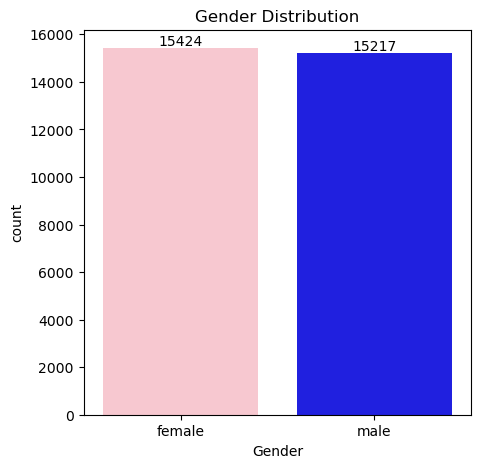

In [72]:
#Gender Distribution
plt.figure(figsize=(5,5))
ax = sns.countplot(data=df, x ="Gender",hue="Gender", palette={"male": "blue", "female": "pink"}, legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Gender Distribution")

The dataset shows a slightly higher female population (15,424) compared to males (15,217). However, the difference is minimal, so gender-based analysis will not be biased toward either group.


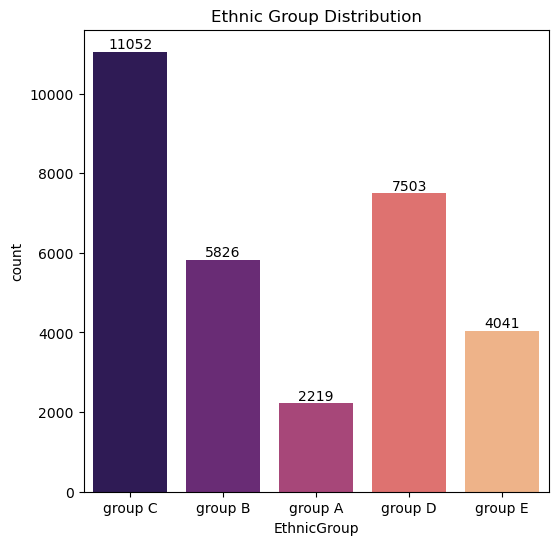

In [73]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='EthnicGroup', data=df, palette='magma', hue='EthnicGroup', legend=False )
for container in ax.containers:
    ax.bar_label(container)
plt.title('Ethnic Group Distribution')
plt.show()

Group C has the highest representation in the dataset (11,052 students), while Group A has the lowest (2,219 students). The variation in group sizes suggests that ethnic group–based analysis might be influenced by the overrepresentation of Group C and underrepresentation of Group A.

In [74]:
print(df["EthnicGroup"].unique())

['group C' 'group B' 'group A' 'group D' 'group E']


In [75]:
print(df["EthnicGroup"].nunique())

5


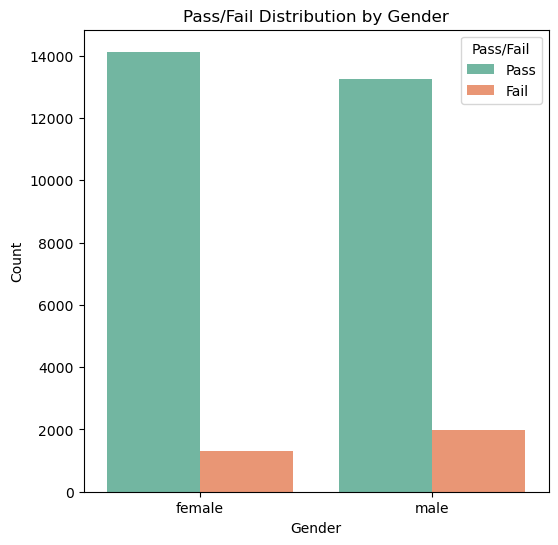

In [82]:
# Create Pass/Fail column based on average score
df['AverageScore'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)
df['Pass_Fail'] = df['AverageScore'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

# Now create the CountPlot
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Gender', hue='Pass_Fail', palette='Set2')
plt.title('Pass/Fail Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Pass/Fail')
plt.show()


This is a bivariate representation of pass/fail counts by gender. The graph indicates that females have a slightly higher pass count and a lower fail count compared to males,

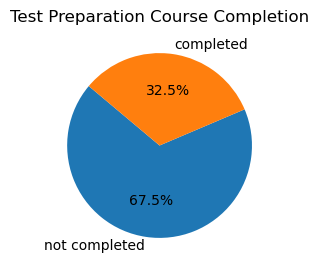

In [76]:
prep_counts = df['TestPrep'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(prep_counts, labels=prep_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Test Preparation Course Completion")
plt.show()


<Axes: xlabel='Subject', ylabel='Average Score'>

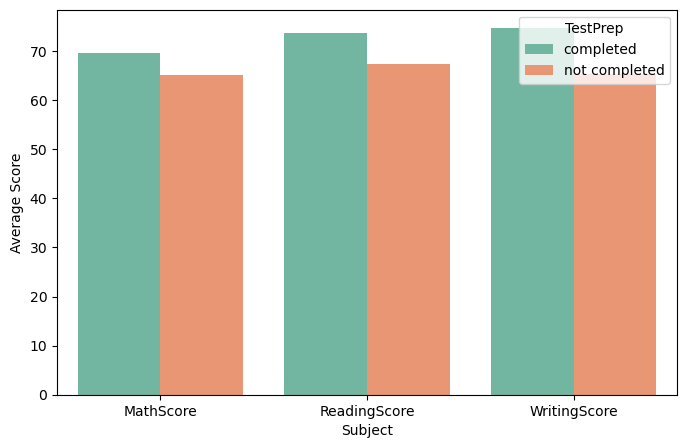

In [87]:
# Prepare data: calculate average scores per group
avg_scores = df.groupby('TestPrep')[['MathScore', 'ReadingScore', 'WritingScore']].mean().reset_index()

# Melt the data for seaborn
avg_scores_melted = avg_scores.melt(id_vars='TestPrep', 
                                    value_vars=['MathScore', 'ReadingScore', 'WritingScore'], 
                                    var_name='Subject', 
                                    value_name='Average Score')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=avg_scores_melted, x='Subject', y='Average Score', hue='TestPrep', palette='Set2')

Based on the bar chart, the conclusion is that students who completed the test preparation course consistently scored higher on average across all three subjects: Math, Reading, and Writing, compared to students who did not complete the course.

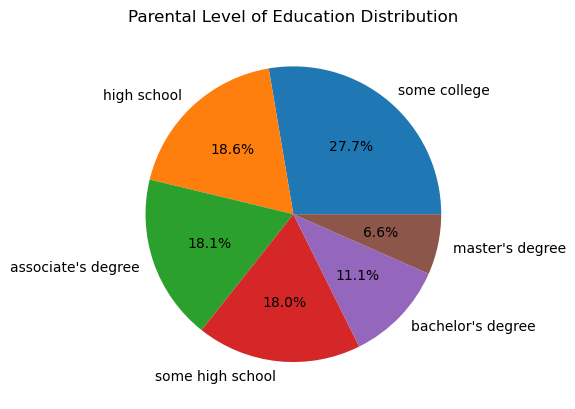

In [77]:
df['ParentEduc'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Parental Level of Education Distribution")
plt.ylabel("")
plt.show()

The data indicates a diverse range of parental education levels. The most common educational level is "some college," while "master's degree" is the least common. The majority of parents have either some college education or a high school degree.

In [79]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.372613     71.135495     70.311802
bachelor's degree   70.474011     73.070289     73.338452
high school         64.456304     67.238878     65.449358
master's degree     72.336629     75.832921     76.357143
some college        66.465322     69.201050     68.469686
some high school    62.605764     65.546130     63.680986


Text(0.5, 1.0, "Relationship between Parent's Education and Student's Score")

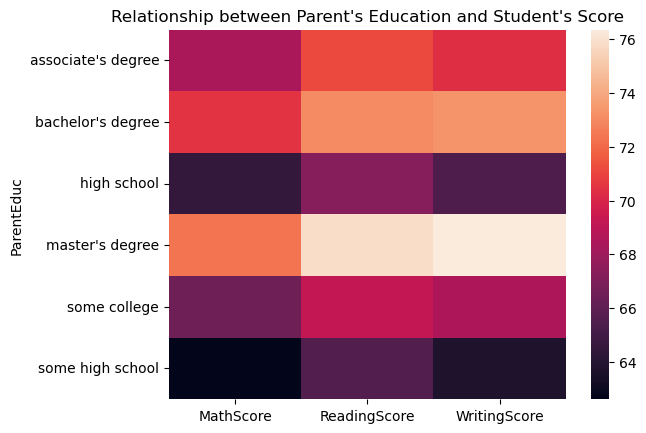

In [88]:
sns.heatmap(gb)
plt.title("Relationship between Parent's Education and Student's Score")

The heatmap shows that darker shades represent lower scores (around 64) and lighter shades represent higher scores (around 76). Students whose parents hold a master’s degree achieve the highest scores across all subjects, while those whose parents have only some high school education tend to score the lowest. This indicates a positive relationship between higher parental education levels and better student performance.

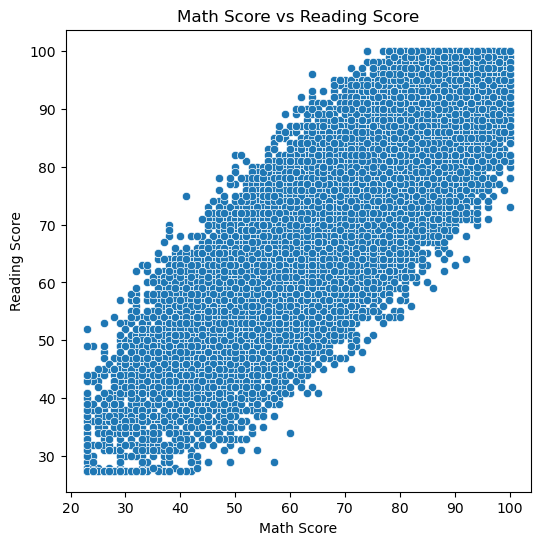

In [85]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='MathScore', y='ReadingScore')
plt.title('Math Score vs Reading Score')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

The scatter plot shows a positive correlation between Math and Reading scores, indicating that students who score high in Reading also tend to score high in Math, and vice versa.

Conclusion:
-->Gender distribution is balanced; females have slightly higher pass rates.

-->Group C is the largest ethnic group; Group A is the smallest.

-->Students completing test preparation score higher in all subjects.

-->“Some college” is the most common parental education; “Master’s degree” is least common.

-->Higher parental education correlates with better student performance.

-->Positive correlation exists between Math and Reading scores.